# Pairs Selection

## Documentation

- [yahoo_fin](https://theautomatic.net/yahoo_fin-documentation/)
- [yfinance](https://ranaroussi.github.io/yfinance/index.html)

In [ ]:
# !pip install yahoo_fin
# !pip install requests_html

In [ ]:
# For data manipulation
import numpy as np
import pandas as pd

# For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# For data preprocessing
from sklearn.decomposition import PCA
from sklearn import preprocessing

# For download data
# import yahoo_fin.stock_info as yf
import yfinance as yf

## Function library

In [ ]:
def get_sp500_tickers():
    '''
    This function returns a list of S&P 500 tickers.
      Helper function for collect_financial_ratios() and get_price_data().
    '''
    sp500_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    sp500_table = pd.read_html(sp500_url)
    sp500_df = sp500_table[0]
    return sp500_df['Symbol'].tolist()

def get_financial_ratios(ticker):
    '''
    This function returns a dictionary of selected financial ratios (latest value) for a given ticker.
      Helper function for collect_financial_ratios().
    '''
    try:
        info = yf.Ticker(ticker).info
        return {
            'Ticker': ticker,
            'Market Cap': info['marketCap'],
            'Revenue Growth': info['revenueGrowth'],
            'Profit Margin': info['profitMargins'],
            'Return on Equity': info['returnOnEquity'],
        }
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

def collect_financial_ratios():
    '''
    This function returns a dataframe of financial ratios for all S&P 500 stocks.
    '''
    tickers = get_sp500_tickers()
    financial_ratios = []
    for ticker in tickers:
        ratio = get_financial_ratios(ticker)
        if ratio is not None:
            financial_ratios.append(ratio)
    return pd.DataFrame(financial_ratios)

def get_price_data(start_date, end_date):
    '''
    This function returns a dataframe of price data for all S&P 500 stocks.
    '''
    tickers = get_sp500_tickers()
    # for ticker in tickers:
    data = yf.download(tickers, start=start_date, end=end_date)['Close']
    return data


## Collect data

Due to limitation of yfinance, i'll be using training data for practice

In [ ]:
# start, end = '2020-01-01', '2024-12-31'

# sp500_prices = get_price_data(start_date=start, end_date=end)
# sp500_fundamentals = collect_financial_ratios()

Due to certain limitation, only 473 of 500 companies data available.

In [ ]:
url_sp500 = 'https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Time%20series/SP_500_data.csv'
url_fundamental = 'https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Time%20series/fundamentals.csv'

# Read data
prices = pd.read_csv(url_sp500, index_col=0)
fundamentals = pd.read_csv(url_fundamental, index_col=0)

In [ ]:
prices.head()

,A,AAP,AAPL,ABBV,ABC,ABMD,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XLNX,XOM,XRAY,XYL,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,85.017082,157.171890,74.096443,81.950539,82.634140,168.809998,204.910950,334.429993,116.506668,43.788410,...,142.405029,59.934875,100.115349,62.684341,56.203197,78.232391,147.579269,259.140015,49.560955,132.803421
2020-01-03,83.652077,157.181747,73.376083,81.172668,81.594910,166.820007,204.569687,331.809998,114.455727,43.702934,...,140.292755,60.223114,97.810677,62.180397,55.581242,78.692863,147.193512,256.049988,48.861588,132.823227
2020-01-06,83.899353,154.598541,73.960770,81.813271,82.789536,179.039993,203.233841,333.709991,113.111015,43.361061,...,140.015091,60.136642,95.771927,62.657814,55.887280,78.183411,146.342834,258.010010,48.266178,131.803482
2020-01-07,84.156532,152.764648,73.612930,81.346550,82.197075,180.350006,198.846008,333.390015,115.684357,42.838757,...,140.679504,60.011738,97.958405,62.145023,56.183449,77.889488,146.214264,256.470001,47.973186,132.248978
2020-01-08,84.987411,151.009644,74.797081,81.923080,82.993492,178.690002,199.236069,337.869995,116.729179,42.363934,...,141.562103,59.954086,97.682640,61.207855,56.775787,78.154007,147.965027,247.639999,48.445744,131.961884


In [ ]:
fundamentals.head()

,profitMargins,revenueGrowth,returnOnEquity
Symbol,,,
MMM,17.294000,9.6,47.467998
ABBV,10.278000,50.9,163.563990
ABMD,26.610002,16.7,18.832001
ACN,12.051000,20.7,32.209998
ATVI,26.957000,27.2,16.302000


## Feature engineering

### Calculate returns

In [ ]:
# Calculate returns
returns = prices.ffill().pct_change().dropna()
returns.head()

,A,AAP,AAPL,ABBV,ABC,ABMD,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XLNX,XOM,XRAY,XYL,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,0.010645,-0.127254,-0.063485,-0.031523,-0.062675,-0.071169,-0.054006,-0.039576,-0.058016,-0.085176,...,0.115715,-0.126919,-0.047707,-0.049085,-0.065224,-0.070897,-0.035450,-0.030745,-0.061284,-0.013583
2020-03-23,-0.046494,0.046248,-0.021244,-0.062772,-0.082868,0.014022,-0.041683,0.040394,0.000940,-0.042470,...,0.107754,-0.012443,0.001948,-0.039401,-0.028032,-0.054266,-0.060130,-0.048277,-0.058640,-0.082029
2020-03-24,0.057283,0.100382,0.100325,0.046356,0.080076,0.085613,0.091586,0.008885,0.100634,0.102695,...,0.156158,0.081000,0.068195,0.126868,0.059875,0.094633,0.155798,0.057580,0.045681,0.119793
2020-03-25,0.029851,0.046191,-0.005509,0.006223,-0.056355,0.022412,-0.032069,-0.013194,0.006722,0.011758,...,0.127704,0.027752,-0.024574,0.052201,0.035197,0.030000,0.036724,0.031459,0.026608,0.042887
2020-03-26,0.068406,0.074693,0.052623,0.087174,0.116921,0.015522,0.128573,0.054787,-0.018440,0.053823,...,-0.047295,0.042484,0.070115,0.041030,0.128940,0.064986,0.044104,0.060570,0.058801,0.089641


### PCA Analysis

In [ ]:
# Number of components (Percentage of variance explained)
desired_variance = 0.90

# Instantiate a PCA object with n_components equal to the desired variance
pca = PCA(n_components=desired_variance)

# Fit PCA on the returns_data
pca.fit(returns)

# Principal component vectors
X = pd.DataFrame(pca.components_.T, index=returns.columns)
print("Number of features in the reduced dataset:", X.shape[1])

Number of features in the reduced dataset: 78


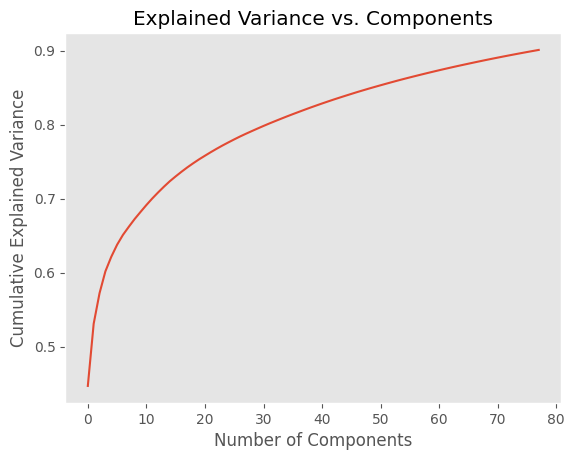

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Components')
plt.grid()
plt.show()

Number of dimensions reduced from 473 to 78 using PCA when the desired explained variance was 90%.

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
A,0.024513,0.047728,0.012189,0.011161,0.012913,-0.012946,-0.044103,0.029851,0.005108,0.043074,...,0.023357,0.014473,0.027339,0.024990,0.020820,-0.007978,0.014990,-0.012895,-0.022593,0.016875
AAP,0.036051,0.025795,-0.025765,-0.027625,-0.022082,0.002110,0.024286,-0.034958,-0.018286,-0.080817,...,-0.027004,0.015581,0.002094,-0.031044,-0.005729,0.035492,-0.010218,0.007201,0.004471,-0.001058
AAPL,0.023743,0.077581,0.027674,0.008564,0.026343,-0.017604,0.046218,-0.008045,-0.002363,-0.012450,...,-0.018649,-0.014389,-0.033826,-0.042536,-0.004396,0.016324,0.036073,-0.044519,0.019626,-0.013355
ABBV,0.018119,0.030860,-0.020158,0.033782,0.033787,0.019544,-0.018505,0.031679,-0.026793,0.011362,...,-0.042240,0.016368,0.051960,-0.009221,-0.082828,0.002874,-0.007810,0.040788,0.019352,-0.051413
ABC,0.029237,0.026735,-0.057144,0.023817,0.010492,-0.000674,0.011740,0.057613,-0.058520,0.022331,...,0.001938,-0.019397,-0.006259,0.020521,0.020482,0.005535,0.015096,-0.034337,-0.050567,0.005366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.042305,0.012578,-0.032099,0.001927,-0.042853,-0.021838,-0.032039,-0.011957,0.007568,-0.010937,...,-0.015027,-0.017927,0.019446,-0.028043,0.009075,0.062113,0.046595,0.032071,0.005375,-0.016719
ZBH,0.048835,0.011880,0.003084,-0.001796,0.053691,0.030774,-0.038543,-0.023006,-0.034037,0.047249,...,0.012385,-0.037579,0.031538,-0.040085,0.009207,-0.002733,-0.007077,-0.022397,0.017300,0.002698
ZBRA,0.037729,0.043955,0.030537,0.007445,-0.006784,-0.058407,-0.021682,0.001544,0.079376,0.007109,...,-0.003733,0.040732,0.032699,0.006164,-0.022107,0.072191,-0.097196,0.064497,0.116349,-0.015236
ZION,0.065537,-0.073111,-0.040511,0.024025,-0.011337,-0.131112,-0.051989,0.003889,-0.026072,0.076164,...,-0.031288,-0.037230,-0.003210,-0.034314,0.016445,-0.011143,-0.014614,0.015363,0.025921,-0.004038


In [ ]:
X.shape

(473, 81)

## Combining PCA components with fundamentals

In [ ]:
for col in fundamentals.columns:
    X[col] = fundamentals[col].values

# Rename columns
X.columns = ['Feature_' + str(i) for i in range(1, X.shape[1]+1)]

print(f'Final features dimension: {X.shape}')
X.head()

Final features dimension: (473, 81)


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_72,Feature_73,Feature_74,Feature_75,Feature_76,Feature_77,Feature_78,Feature_79,Feature_80,Feature_81
A,0.024513,0.047728,0.012189,0.011161,0.012913,-0.012946,-0.044103,0.029851,0.005108,0.043074,...,0.024990,0.020820,-0.007978,0.014990,-0.012895,-0.022593,0.016875,17.294000,9.6,47.467998
AAP,0.036051,0.025795,-0.025765,-0.027625,-0.022082,0.002110,0.024286,-0.034958,-0.018286,-0.080817,...,-0.031044,-0.005729,0.035492,-0.010218,0.007201,0.004471,-0.001058,10.278000,50.9,163.563990
AAPL,0.023743,0.077581,0.027674,0.008564,0.026343,-0.017604,0.046218,-0.008045,-0.002363,-0.012450,...,-0.042536,-0.004396,0.016324,0.036073,-0.044519,0.019626,-0.013355,26.610002,16.7,18.832001
ABBV,0.018119,0.030860,-0.020158,0.033782,0.033787,0.019544,-0.018505,0.031679,-0.026793,0.011362,...,-0.009221,-0.082828,0.002874,-0.007810,0.040788,0.019352,-0.051413,12.051000,20.7,32.209998
ABC,0.029237,0.026735,-0.057144,0.023817,0.010492,-0.000674,0.011740,0.057613,-0.058520,0.022331,...,0.020521,0.020482,0.005535,0.015096,-0.034337,-0.050567,0.005366,26.957000,27.2,16.302000


Number of features increased from 78 to 81.

In [ ]:
# Create dataframe of X
X = pd.DataFrame(X.T, index=returns.columns)

# Rename column
X.columns = ['Feature_' + str(i) for i in range(1, X.shape[1]+1)]
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_72,Feature_73,Feature_74,Feature_75,Feature_76,Feature_77,Feature_78,Feature_79,Feature_80,Feature_81
A,0.024513,0.047728,0.012189,0.011161,0.012913,-0.012946,-0.044103,0.029851,0.005108,0.043074,...,0.024990,0.020820,-0.007978,0.014990,-0.012895,-0.022593,0.016875,17.294000,9.6,47.467998
AAP,0.036051,0.025795,-0.025765,-0.027625,-0.022082,0.002110,0.024286,-0.034958,-0.018286,-0.080817,...,-0.031044,-0.005729,0.035492,-0.010218,0.007201,0.004471,-0.001058,10.278000,50.9,163.563990
AAPL,0.023743,0.077581,0.027674,0.008564,0.026343,-0.017604,0.046218,-0.008045,-0.002363,-0.012450,...,-0.042536,-0.004396,0.016324,0.036073,-0.044519,0.019626,-0.013355,26.610002,16.7,18.832001
ABBV,0.018119,0.030860,-0.020158,0.033782,0.033787,0.019544,-0.018505,0.031679,-0.026793,0.011362,...,-0.009221,-0.082828,0.002874,-0.007810,0.040788,0.019352,-0.051413,12.051000,20.7,32.209998
ABC,0.029237,0.026735,-0.057144,0.023817,0.010492,-0.000674,0.011740,0.057613,-0.058520,0.022331,...,0.020521,0.020482,0.005535,0.015096,-0.034337,-0.050567,0.005366,26.957000,27.2,16.302000


## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize data
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X), index=X.index, columns=X.columns)
X_scaled.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_72,Feature_73,Feature_74,Feature_75,Feature_76,Feature_77,Feature_78,Feature_79,Feature_80,Feature_81
A,-0.798170,0.728196,0.406469,0.193927,0.213681,-0.278796,-1.013349,0.543785,0.131408,0.958665,...,0.553283,0.453515,-0.157554,0.339460,-0.290966,-0.492390,0.365527,0.272314,-0.055108,0.011016
AAP,-0.241226,0.217300,-0.426884,-0.650628,-0.549153,0.048669,0.476085,-0.874122,-0.377495,-1.736424,...,-0.665427,-0.123906,0.787983,-0.208829,0.146102,0.096209,-0.024483,-0.033610,-0.017808,0.451740
AAPL,-0.835315,1.423575,0.746478,0.137382,0.506444,-0.380093,0.953738,-0.285309,-0.031109,-0.249204,...,-0.915373,-0.094916,0.371054,0.798020,-0.978784,0.425828,-0.291930,0.678526,-0.048695,-0.097692
ABBV,-1.106765,0.335284,-0.303775,0.686502,0.668700,0.427830,-0.455855,0.583775,-0.562534,0.268796,...,-0.190786,-1.800684,0.078500,-0.156450,0.876616,0.419853,-1.119642,0.043700,-0.045083,-0.046907
ABC,-0.570147,0.239204,-1.115876,0.469511,0.160914,-0.011878,0.202845,1.151160,-1.252703,0.507411,...,0.456074,0.446149,0.136367,0.341768,-0.757339,-1.100775,0.115237,0.693656,-0.039213,-0.107297


## DBSCAN clustering

In [ ]:
from sklearn.cluster import DBSCAN

# Instantiate a DBScan object
dbscan = DBSCAN(eps=5, min_samples=3)

# # Fit dbscan on X
# dbscan.fit(X_scaled)

# # cluster labels
# labels = dbscan.labels_

# Return cluster labels
labels = dbscan.fit_predict(X_scaled)

# Number of clusters (noise is labelled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Clusters discovered: {n_clusters}")

Clusters discovered: 9


There are 9 clusters with at least 3 stocks inside each cluster.

In [ ]:
# Create a series with cluster labels
clustered_series_all = pd.Series(index=X_scaled.index, data=labels.flatten())

# Remove the data points with label '-1' as they are the noise
clustered_series = clustered_series_all[clustered_series_all != -1]

### Visualize clusters

The X_scaled has 81 features in the data, and it is impossible to visualize data in an 81-dimensional space.

Using `Distributed Stochastic Neighbor Embedding (TSNE)` plots a high-dimensional dataset in a lower-dimensional space, reducing the dimensions from 81 to 2 for representation.

In [ ]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2,
              learning_rate=100,
              perplexity=25,
              random_state=7).fit_transform(X_scaled)
print(X_tsne[:5])

[[ 5.953507   1.4918422]
 [12.645468  14.935117 ]
 [-9.402366  14.253318 ]
 [ 8.716066   4.119801 ]
 [19.341978  -9.921505 ]]


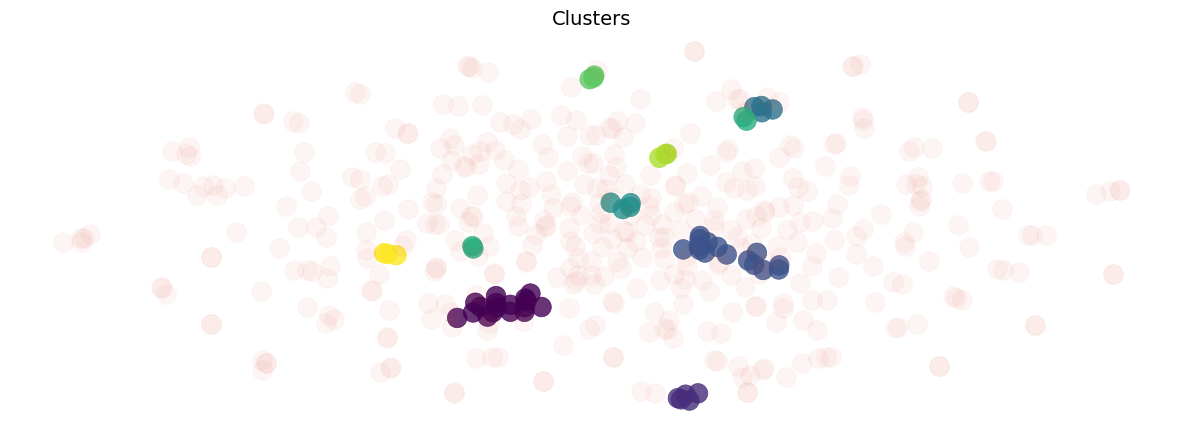

In [ ]:
# import matplotlib.pyplot as plt

# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clustered_series_all, cmap='viridis', s=10)
# plt.title("t-SNE Visualization of Clusters")
# plt.colorbar()
# plt.show()


# Create the figure
plt.figure(1, facecolor='white', figsize=(15,5))
plt.axis('off')

# Plot the clusters
plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=200,
    alpha=0.8,
    c=labels[labels!=-1],
    cmap='viridis'
)

# Plot the noise
plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=200,
    alpha=0.05
)

# Set the title
plt.title('Clusters', fontsize=14)
plt.show()

### Cluster count

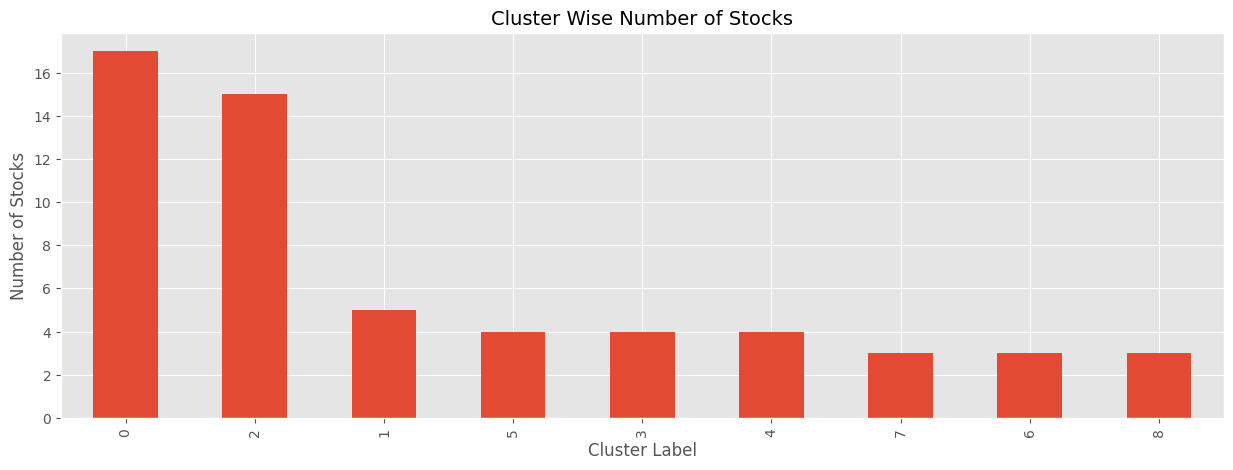

In [ ]:
# Plot the bar graph for the number of stocks in each cluster
clustered_series.value_counts().plot.bar(figsize=(15, 5))

# Set title and axis label
plt.title("Cluster Wise Number of Stocks", fontsize=14)
plt.xlabel("Cluster Label", fontsize=12)
plt.ylabel("Number of Stocks", fontsize=12)
plt.show()

## Creating Stock Pairs

In [ ]:
clustered_series[clustered_series == 5]

,0
BAC,5
JPM,5
PNC,5
USB,5


In [ ]:
from itertools import combinations

# Dictionary to store pairs
stocks_pair = {}

# Create pairs
for cluster in range(n_clusters):
    stocks = clustered_series[clustered_series == cluster].index
    pairs = list(combinations(stocks, 2))
    stocks_pair[cluster] = pairs

# Convert the dictionary into a dataframe
stocks_pair = pd.DataFrame.from_dict(stocks_pair.items())
stocks_pair.rename(columns={0:'Cluster No.', 1: "Pairs"}, inplace=True)
stocks_pair = stocks_pair.set_index('Cluster No.')

# Number of pairs in a cluster
stocks_pair['Number of Pairs'] = stocks_pair['Pairs'].apply(lambda x:len(x))
stocks_pair

,Pairs,Number of Pairs
Cluster No.,,
0,"[(AEE, AEP), (AEE, ATO), (AEE, AWK), (AEE, CMS...",136
1,"[(AVB, EQR), (AVB, ESS), (AVB, MAA), (AVB, UDR...",10
2,"[(CAG, CL), (CAG, COST), (CAG, CPB), (CAG, GIS...",105
3,"[(CFG, FITB), (CFG, KEY), (CFG, RF), (FITB, KE...",6
4,"[(EMR, ETN), (EMR, ITW), (EMR, ROK), (ETN, ITW...",6
5,"[(BAC, JPM), (BAC, PNC), (BAC, USB), (JPM, PNC...",6
6,"[(LHX, LMT), (LHX, NOC), (LMT, NOC)]",3
7,"[(CSX, NSC), (CSX, UNP), (NSC, UNP)]",3
8,"[(MET, PFG), (MET, PRU), (PFG, PRU)]",3


In [ ]:
stocks_pair.iloc[5]['Pairs']

[('BAC', 'JPM'),
 ('BAC', 'PNC'),
 ('BAC', 'USB'),
 ('JPM', 'PNC'),
 ('JPM', 'USB'),
 ('PNC', 'USB')]

## Choosing alogirthms

| Criterion                  | Best Algorithm(s)                     | Explanation                                                                 |
|----------------------------|----------------------------------------|-----------------------------------------------------------------------------|
| **Cluster Shape**          | K-Means, DBSCAN, OPTICS               | K-Means works well for spherical clusters, while DBSCAN/OPTICS handle arbitrary shapes. |
| **Cluster Size**           | DBSCAN, OPTICS, GMM                   | Suitable for clusters with varying densities.                              |
| **Scalability**            | K-Means, GMM                          | K-Means and GMM are faster for large datasets. Mean-Shift and hierarchical methods are slower. |
| **Outlier Sensitivity**    | DBSCAN, OPTICS                        | Density-based methods handle outliers better than K-Means.                 |
| **Probabilistic Assignments** | GMM                                 | Provides probabilities for cluster memberships.                            |


# Pairs Trading

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

## libray

In [ ]:
def cointegration(x,y):
    '''
    Calculate the cointegration of two time series with OLS and AFT test
    '''
    result = sm.OLS(x, y).fit() # var(x,y)
    adf_result = sm.tsa.stattools.adfuller(result.resid) # check stationarity
    return adf_result[0] < adf_result[4]['5%'] and adf_result[1] < 0.05


def zscore_cal(data1, data2, start, end):
    '''
    Calculate the z-score of the spread between two securities.
    '''
    s1 = np.log(data1[start:end])
    s2 = np.log(data2[start:end])
    spread = s1 - s2
    mean = np.mean(spread)
    std = np.std(spread)
    current_spread = spread.iloc[-1]

    zscore = (current_spread - mean) / std if std != 0 else np.nan
    return zscore


def trade_signal(zscore, threshold, is_stationary):
    '''
    Generate a trading signal (Buy/Sell) based on the z-score and cointergration test (stationarity)
    '''
    if not np.isnan(zscore):
        if zscore > threshold and is_stationary:
            return 'SELL'
        elif zscore < -threshold and is_stationary:
            return 'BUY'
    return ''

def trade_status(prev_status, mtm, SL, TP, signal, is_stationary):
    '''
    Determine the current trade status based on previous status, MTM, thresholds, and signals.
        SL: stop loss
        TP: take profit
        CB: Co-integration break
    '''
    # check initial status
    if prev_status in ['','SL','TP','CB']:
        return signal

    # check cointegration break
    if is_stationary == 'No':
        return 'CB'

    # evaluate MTM threshold for SL and TP
    if mtm != "":
        if mtm < SL:
            return 'SL'
        elif mtm > TP:
            return 'TP'

    # Default: retain previous status
    return prev_status


def buy_price(prev_status, prev_buy_price, buy_price, signal, status, data1, data2, end):
    '''
    Calculate the buy price based on the previous status, buy price, and current signal.
        prev_status: previous trade status
        prev_buy_price: previous buy price
        buy_price: current buy price
        signal: current signal
        status: current trade status
    '''
    if status == prev_status:
        buy_price = prev_buy_price

    else:
        if status in ["SL", "TP", "CB", ""]:
            buy_price = ""
        else:
            # Signal is to buy the spread
            if signal == "BUY":
                # buy price = close of first security
                buy_price = data1['Close'][end]
            else:
                # Signal is to sell the spread
                if signal == "SELL":
                    # Hence, buy price = close of second security
                    buy_price = data2['Close'][end]
                else:
                    # no signal hence no buy price
                    buy_price = ""

    return buy_price


def sell_price(prev_status, prev_sell_price, sell_price, signal, status, data1, data2, end):
    '''
    Calculate the sell price based on the previous status, sell price, and current signal.
        prev_status: previous trade status
        prev_sell_price: previous sell price
        sell_price: current sell price
        signal: current signal
    '''
    if status == prev_status:
        sell_price = prev_sell_price
    else:
        if status in ["SL", "TP", "CB", ""]:
            sell_price = ""
        else:
            # Signal is to buy the spread
            if signal == "BUY":
                # Hence sell price = close of second security
                sell_price = data2['Close'][end]
            else:
                if signal == "SELL":  # signal is to sell the spread
                    # Hence sell price = close of first security
                    sell_price = data1['Close'][end]
                else:
                    # No signal hence no sell price either
                    sell_price = ""

    return sell_price


def mtm_cal(data1, data2, prev_status, prev_sell_price, prev_buy_price, M, N, end):
    '''

    '''
    if prev_status == "BUY":
        # Calculate mtm of the trades using their lot sizes
        mtm = (prev_sell_price-data2['Close'][end])*M + (data1['Close'][end] -
                                                         prev_buy_price)*N
    else:
        if prev_status == "SELL":
            # Calculate mtm of the trades using their lot sizes
            mtm = (prev_sell_price-data1['Close'][end])*N + (data2['Close'][end]
                                                             - prev_buy_price)*M
        else:
            mtm = ""

    return mtm

## Cointegration test

In [58]:
x = prices['BAC']
y = prices['JPM']

In [62]:
# calculate variance of two securities
variance = sm.OLS(x, y).fit()

# check for stationarity using ADF test
adf_results = ts.adfuller(variance.resid)

# extract test statistics, p-value, and critical value
t_stat = adf_results[0]
p_value = adf_results[1]
critical_val = adf_results[4]

# Output the results
print(f"Test Statistic: {t_stat}")
print(f"P-Value: {p_value}")
print(f"Critical Values: {critical_val}")

# Compare the test statistic to critical values
if t_stat < critical_val['5%']:
    print("Residuals are stationary, the pair is cointegrated")
else:
    print("Residuals are non-stationary, the pair is not cointegrated")

Test Statistic: -2.019035796093671
P-Value: 0.2782894385763852
Critical Values: {'1%': -3.447014064067954, '5%': -2.8688850015516016, '10%': -2.5706826870693797}
Residuals are non-stationary, the pair is not cointegrated


In [63]:
# Perform the Engle-Granger cointegration test
coint = ts.coint(x, y)

# Extract the test statistic, p-value, and critical values
test_statistic = coint[0]
p_value = coint[1]
critical_values = coint[2]

# Output the results
print(f"Test Statistic: {test_statistic}")
print(f"P-Value: {p_value}")
print(f"Critical Values: {critical_values}")

# Compare the test statistic to critical values
if test_statistic < critical_values[1]:  # Compare to the 5% critical value
    print("Cointegrated based on critical value")
else:
    print("Not Cointegrated based on critical value")


Test Statistic: -2.0716638732971244
P-Value: 0.4911841226237588
Critical Values: [-3.92423937 -3.35156397 -3.05515038]
Not Cointegrated based on critical value


In [78]:
def cointegration_test_EG(pairs_tuple, cluster, period=-90, alpha='5%'):
    """
    Perform the Engle-Granger cointegration test for two time series.
    """
    # Convert alpha from string to float
    alpha_mapping = {'1%': 0.01, '5%': 0.05, '10%': 0.10}
    alpha_float = alpha_mapping.get(alpha, 0.05)  # Default to 5% if invalid alpha is given

    # Periods as relative to the end
    period = -abs(period)

    # Perform the Engle-Granger cointegration test for each day for n_period
    results = []
    for pair in pairs_tuple.iloc[cluster]['Pairs']:
        s1, s2 = pair
        try:
            coint_test = ts.coint(prices[s1][period:], prices[s2][period:])
        except Exception as e:
            print(f"Error in pair {pair}: {e}")
            continue

        # Extract the p-value and test statistic
        p_value = coint_test[1]
        test_stat = coint_test[0]
        crit_values = coint_test[2]

        # Store results
        results.append({
            'Pair': f"{s1}-{s2}",
            'P-Value': p_value,
            'Test Statistic': test_stat,
            f'Critical Value ({alpha})': crit_values[list(alpha_mapping.values()).index(alpha_float)],
            'Cointegrated': p_value < alpha_float
        })

    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    return results_df


def cointegration_test_ADF(pairs_tuple, cluster, period=-90, alpha='5%'):
    """
    Perform the ADF test on the residuals of an OLS regression to test for cointegration.
    """
    # Convert alpha from string to float
    alpha_mapping = {'1%': 0.01, '5%': 0.05, '10%': 0.10}
    alpha_float = alpha_mapping.get(alpha, 0.05)  # Default to 5% if invalid alpha is given

    # Periods as relative to the end
    period = -abs(period)

    # Perform ADF test for each pair
    results = []
    for pair in pairs_tuple.iloc[cluster]['Pairs']:
        s1, s2 = pair
        try:
            # Compute variance (OLS regression)
            variance = sm.OLS(prices[s1][period:], prices[s2][period:]).fit()

            # Perform the ADF test on residuals
            adf_test = ts.adfuller(variance.resid)
        except Exception as e:
            print(f"Error in pair {pair}: {e}")
            continue  # Skip this pair if an error occurs

        # Extract test results
        t_stat = adf_test[0]
        p_value = adf_test[1]
        critical_val = adf_test[4]  # Dictionary of critical values

        results.append({
            'Pair': f"{s1}-{s2}",
            'Test Statistic': t_stat,
            'P-Value': p_value,
            f'Critical Value ({alpha})': critical_val[alpha],
            'Cointegrated': p_value < alpha_float
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [83]:
cointegration_test_EG(stocks_pair, 2)

Error in pair ('CAG', 'COST'): exog contains inf or nans
Error in pair ('CAG', 'K'): exog contains inf or nans
Error in pair ('CAG', 'KMB'): exog contains inf or nans
Error in pair ('CAG', 'KO'): exog contains inf or nans
Error in pair ('CAG', 'MNST'): exog contains inf or nans
Error in pair ('CAG', 'PEP'): exog contains inf or nans
Error in pair ('CL', 'COST'): exog contains inf or nans
Error in pair ('CL', 'K'): exog contains inf or nans
Error in pair ('CL', 'KMB'): exog contains inf or nans
Error in pair ('CL', 'KO'): exog contains inf or nans
Error in pair ('CL', 'MNST'): exog contains inf or nans
Error in pair ('CL', 'PEP'): exog contains inf or nans


<ipython-input-78-0376e6b6a0ca>:17: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_test = ts.coint(prices[s1][period:], prices[s2][period:])
<ipython-input-78-0376e6b6a0ca>:17: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_test = ts.coint(prices[s1][period:], prices[s2][period:])
<ipython-input-78-0376e6b6a0ca>:17: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_test = ts.coint(prices[s1][period:], prices[s2][period:])
<ipython-input-78-0376e6b6a0ca>:17: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_test = ts.coint(prices[s1][period:], prices[s2][period:])
<ipython-input-78-0376e6b6a0ca>:17: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this ca

Error in pair ('COST', 'K'): exog contains inf or nans
Error in pair ('COST', 'KMB'): exog contains inf or nans
Error in pair ('COST', 'KO'): exog contains inf or nans
Error in pair ('COST', 'MNST'): exog contains inf or nans
Error in pair ('COST', 'PEP'): exog contains inf or nans
Error in pair ('CPB', 'K'): exog contains inf or nans
Error in pair ('CPB', 'KMB'): exog contains inf or nans
Error in pair ('CPB', 'KO'): exog contains inf or nans
Error in pair ('CPB', 'MNST'): exog contains inf or nans
Error in pair ('CPB', 'PEP'): exog contains inf or nans
Error in pair ('GIS', 'K'): exog contains inf or nans
Error in pair ('GIS', 'KMB'): exog contains inf or nans
Error in pair ('GIS', 'KO'): exog contains inf or nans
Error in pair ('GIS', 'MNST'): exog contains inf or nans
Error in pair ('GIS', 'PEP'): exog contains inf or nans
Error in pair ('HSY', 'K'): exog contains inf or nans
Error in pair ('HSY', 'KMB'): exog contains inf or nans
Error in pair ('HSY', 'KO'): exog contains inf or n

<ipython-input-78-0376e6b6a0ca>:17: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_test = ts.coint(prices[s1][period:], prices[s2][period:])
<ipython-input-78-0376e6b6a0ca>:17: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_test = ts.coint(prices[s1][period:], prices[s2][period:])
<ipython-input-78-0376e6b6a0ca>:17: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_test = ts.coint(prices[s1][period:], prices[s2][period:])
<ipython-input-78-0376e6b6a0ca>:17: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_test = ts.coint(prices[s1][period:], prices[s2][period:])
<ipython-input-78-0376e6b6a0ca>:17: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this ca

,Pair,P-Value,Test Statistic,Critical Value (5%),Cointegrated
0,CAG-CL,0.948848,-0.679088,-3.405644,False
1,CAG-CPB,0.598479,-1.863337,-3.405644,False
2,CAG-GIS,0.226767,-2.627405,-3.405644,False
3,CAG-HSY,0.710981,-1.623242,-3.405644,False
4,CAG-MDLZ,0.825539,-1.313778,-3.405644,False
5,CAG-MKC,0.134634,-2.904687,-3.405644,False
6,CAG-PG,0.364198,-2.318824,-3.405644,False
7,CAG-VZ,0.866206,-1.167504,-3.405644,False
8,CL-CPB,0.208470,-2.675620,-3.405644,False
9,CL-GIS,0.478957,-2.095046,-3.405644,False


In [84]:
cointegration_test_ADF(stocks_pair, 2)

Error in pair ('CAG', 'COST'): exog contains inf or nans
Error in pair ('CAG', 'K'): exog contains inf or nans
Error in pair ('CAG', 'KMB'): exog contains inf or nans
Error in pair ('CAG', 'KO'): exog contains inf or nans
Error in pair ('CAG', 'MNST'): exog contains inf or nans
Error in pair ('CAG', 'PEP'): exog contains inf or nans
Error in pair ('CL', 'COST'): exog contains inf or nans
Error in pair ('CL', 'K'): exog contains inf or nans
Error in pair ('CL', 'KMB'): exog contains inf or nans
Error in pair ('CL', 'KO'): exog contains inf or nans
Error in pair ('CL', 'MNST'): exog contains inf or nans
Error in pair ('CL', 'PEP'): exog contains inf or nans
Error in pair ('COST', 'CPB'): exog contains inf or nans
Error in pair ('COST', 'GIS'): exog contains inf or nans
Error in pair ('COST', 'HSY'): exog contains inf or nans
Error in pair ('COST', 'K'): exog contains inf or nans
Error in pair ('COST', 'KMB'): exog contains inf or nans
Error in pair ('COST', 'KO'): exog contains inf or na

,Pair,Test Statistic,P-Value,Critical Value (5%),Cointegrated
0,CAG-CL,-1.049357,0.734840,-2.894607,False
1,CAG-CPB,-2.101264,0.244007,-2.894607,False
2,CAG-GIS,-1.566584,0.500354,-2.894607,False
3,CAG-HSY,0.383059,0.980850,-2.894607,False
4,CAG-MDLZ,-0.249723,0.932329,-2.894607,False
5,CAG-MKC,-1.406827,0.578999,-2.894607,False
6,CAG-PG,0.740536,0.990613,-2.894607,False
7,CAG-VZ,-0.929039,0.778259,-2.894607,False
8,CL-CPB,-0.875982,0.795779,-2.899878,False
9,CL-GIS,-1.379569,0.592031,-2.894990,False


## Z-score

## Generate trade signal

## Trade status

## Buy/Sell price

In [ ]:
sm.OLS(prices['BAC'], prices['AAPL']).fit()